In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv(r"C:\Users\adity\Desktop\ml proj\Diamond_Price-main\notebooks\data\gemstone.csv")


In [13]:
df.sample(10, random_state=999)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
184046,184046,1.05,Ideal,E,SI1,61.4,55.0,6.59,6.56,4.04,6937
49070,49070,1.50,Good,J,VS1,60.1,60.0,7.30,7.36,4.41,8359
143111,143111,0.54,Very Good,F,VVS2,62.8,54.0,5.22,5.25,3.29,2362
89111,89111,0.33,Ideal,F,VVS2,61.7,55.0,4.48,4.47,2.76,1041
136184,136184,0.90,Premium,I,SI1,62.5,58.0,6.13,6.06,3.81,3220
180149,180149,1.01,Good,D,SI2,63.6,57.0,6.37,6.35,4.04,4956
156527,156527,1.01,Ideal,F,VS1,62.0,56.0,6.43,6.41,3.98,7862
123860,123860,0.34,Premium,I,VVS2,60.1,59.0,4.52,4.55,2.73,596
100985,100985,2.14,Premium,J,SI2,61.6,58.0,8.35,8.29,5.14,12970
127124,127124,2.01,Ideal,I,SI1,60.5,57.0,8.08,8.13,4.91,17143


### Dataset Features

The features in our dataset are described in the table below. These descriptions are taken from the Kaggle data source.

In [14]:
from tabulate import tabulate

table = [
    ['Name', 'Data Type', 'Units', 'Description'],
    ['id', 'Nominal Categorical', '-', 'Unique identifier of each diamond'],
    ['carat', 'Numeric', 'ct.', 'Weight of the diamond (0.2--5.01)'],
    ['cut', 'Nominal Categorical', '-', 'Quality of the cut (Fair, Good, Very Good, Premium, Ideal)'],
    ['color', 'Nominal Categorical', '-', 'Diamond colour, from J (worst) to D (best)'],
    ['clarity', 'Nominal Categorical', '-', 'Measurement of how clear the diamond is\n (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))'],
    ['depth', 'Numeric', 'mm', 'Height of diamond from culet to table (43--79)'],
    ['table', 'Numeric', '-', "Width of top of diamond relative to widest point (43--95)"],
    ['x', 'Numeric', 'mm', 'Length in mm (0--10.74)'],
    ['y', 'Numeric', 'mm', 'Width in mm (0--58.9)'],
    ['z', 'Numeric', 'mm', 'Depth in mm (0--31.8)'],
    ['price', 'Numeric', 'USD', 'Price in US dollars ($326--$18,823)']
]

print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))


╒═════════╤═════════════════════╤═════════╤════════════════════════════════════════════════════════════╕
│ Name    │ Data Type           │ Units   │ Description                                                │
╞═════════╪═════════════════════╪═════════╪════════════════════════════════════════════════════════════╡
│ id      │ Nominal Categorical │ -       │ Unique identifier of each diamond                          │
├─────────┼─────────────────────┼─────────┼────────────────────────────────────────────────────────────┤
│ carat   │ Numeric             │ ct.     │ Weight of the diamond (0.2--5.01)                          │
├─────────┼─────────────────────┼─────────┼────────────────────────────────────────────────────────────┤
│ cut     │ Nominal Categorical │ -       │ Quality of the cut (Fair, Good, Very Good, Premium, Ideal) │
├─────────┼─────────────────────┼─────────┼────────────────────────────────────────────────────────────┤
│ color   │ Nominal Categorical │ -       │ Diamond col

### Target Feature

The target feature "price" represents the price of diamonds in US dollars and is a numeric variable ranging from dollor 326 to dollor 18,823.

In [15]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

'id' is irrelivant feature,thus it is considered as redundant and removed. 

In [16]:
## Lets drop the id column
df=df.drop(labels=['id'],axis=1)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


### Next we check the data types and observe that they match the intended data types, thus no change is needed here. 

In [17]:
# Check for data types
print(f"Shape of the dataset = {df.shape} \n")
print(f"Data types are below where 'object' indicates a string type: ")
print(df.dtypes)

Shape of the dataset = (193573, 10) 

Data types are below where 'object' indicates a string type: 
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object


### Let's see the Categorical Features

In [18]:
from IPython.display import display, HTML
display(HTML('<b>Table 1: Summary of categorical features</b>'))
df.describe(include='object').T

,count,unique,top,freq
cut,193573,5,Ideal,92454
color,193573,7,G,44391
clarity,193573,8,SI1,53272


In [19]:

categoricalColumns = df.columns[df.dtypes==object].tolist()

for col in categoricalColumns:
    print('Unique values for ' + col)
    print(df[col].unique())
    print('')

Unique values for cut
['Premium' 'Very Good' 'Ideal' 'Good' 'Fair']

Unique values for color
['F' 'J' 'G' 'E' 'D' 'H' 'I']

Unique values for clarity
['VS2' 'SI2' 'VS1' 'SI1' 'IF' 'VVS2' 'VVS1' 'I1']



### Let's see the Numerical Features

In [20]:
from IPython.display import display, HTML
display(HTML('<b>Table 2: Summary of numerical features</b>'))
df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
carat,193573.0,0.790688,0.462688,0.2,0.40,0.70,1.03,3.50
depth,193573.0,61.820574,1.081704,52.1,61.30,61.90,62.40,71.60
table,193573.0,57.227675,1.918844,49.0,56.00,57.00,58.00,79.00
x,193573.0,5.715312,1.109422,0.0,4.70,5.70,6.51,9.65
y,193573.0,5.720094,1.102333,0.0,4.71,5.72,6.51,10.01
z,193573.0,3.534246,0.688922,0.0,2.90,3.53,4.03,31.30
price,193573.0,3969.155414,4034.374138,326.0,951.00,2401.00,5408.00,18818.00


The summary statistics are generated for all the numerical features. There does not seem to be any outliers in the data. 

### Check for Missing value

In [21]:
# Count missing values in each column
print(f"\nNumber of missing values for each column/ feature:")
df.isnull().sum()


Number of missing values for each column/ feature:


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

No missing values present in the dataset

## check for duplicated records

In [22]:
df.duplicated().sum()

0

No any Duplicate column is present.

### Random Sampling

As the data has more than 5000 rows, random sampling is done to get only 5000 rows out of the remaining 6196 rows for ease of computation. At the end, we display 5 random rows from our cleaned data.

In [23]:
df = df.sample(n=5000, random_state=999)
df.shape
df.sample(5, random_state=999)

,carat,cut,color,clarity,depth,table,x,y,z,price
184829,1.00,Good,D,SI2,61.8,62.0,6.38,6.45,3.96,5313
116432,0.36,Ideal,G,SI1,61.6,56.0,4.60,4.56,2.82,689
58038,0.73,Premium,D,SI2,62.5,58.0,5.76,5.69,3.58,2691
26536,0.72,Ideal,F,VS1,61.8,56.0,5.76,5.79,3.57,2913
41978,1.50,Ideal,G,SI1,61.7,57.0,7.37,7.34,4.53,10374


## segregate numerical and categorical columns for next task:

In [24]:
## segregate numerical and categorical columns

numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']
print("Numerical columns:",numerical_columns)
print('Categorical Columns:',categorical_columns)

Numerical columns: Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], dtype='object')
Categorical Columns: Index(['cut', 'color', 'clarity'], dtype='object')


In [25]:
df[categorical_columns].describe()

,cut,color,clarity
count,5000,5000,5000
unique,5,7,8
top,Ideal,G,SI1
freq,2388,1116,1380


In [26]:
df['cut'].value_counts()

cut
Ideal        2388
Premium      1262
Very Good     984
Good          307
Fair           59
Name: count, dtype: int64

In [27]:
df['color'].value_counts()

color
G    1116
E     950
F     874
H     814
D     637
I     454
J     155
Name: count, dtype: int64

In [28]:
df['clarity'].value_counts()

clarity
SI1     1380
VS2     1170
SI2      835
VS1      822
VVS2     396
VVS1     286
IF        98
I1        13
Name: count, dtype: int64

## Data Exploration and Visualisation<a id='Data-Exploration-and-Visualisation'></a>: 

Our dataset is now considered to be clean and we are ready to start visualising and explore each of the features.

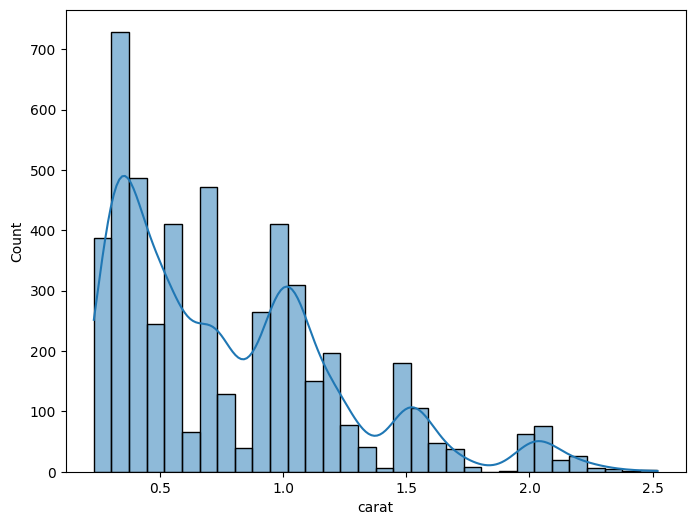

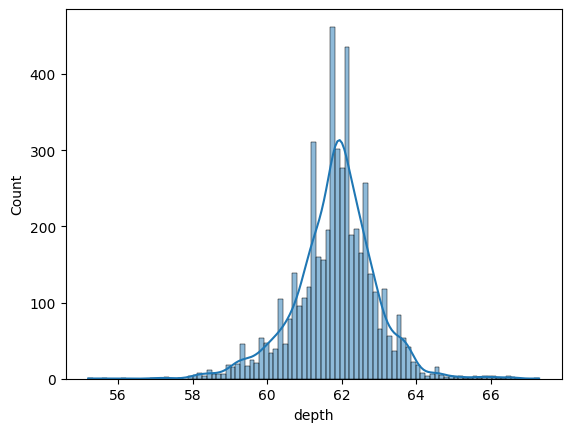

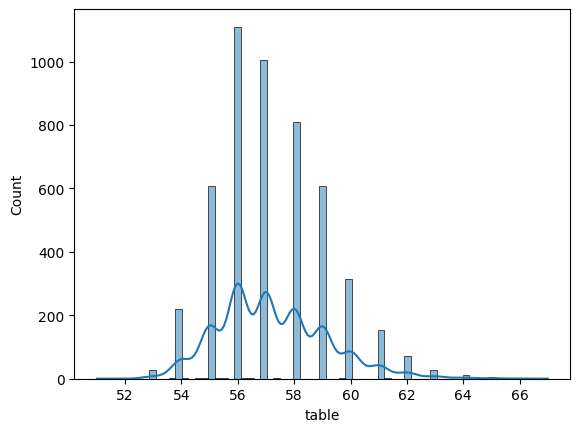

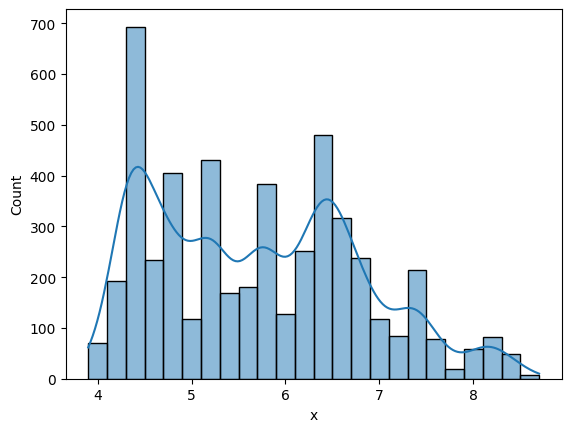

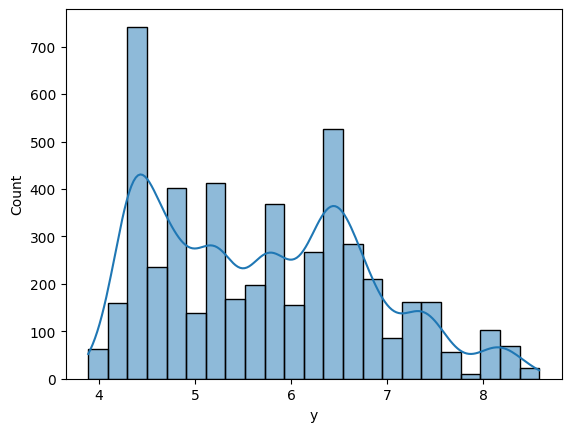

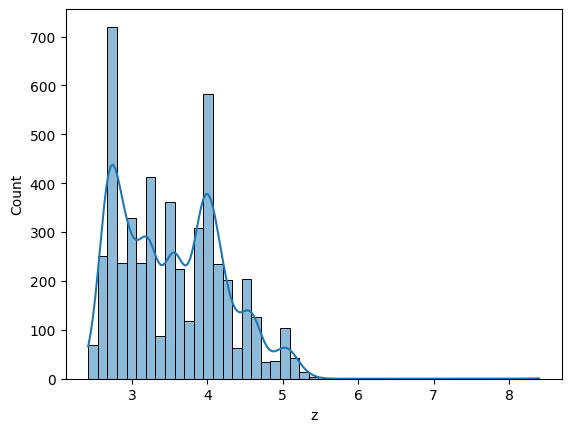

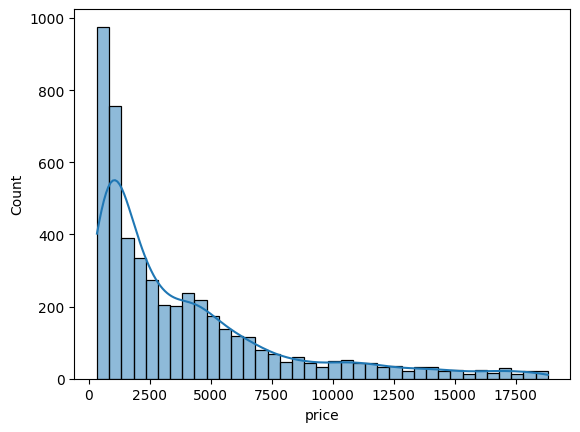

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    print('\n')
    plt.show()

### Bar Chart   of all the categorical Columns(''cut', 'color', 'clarity')

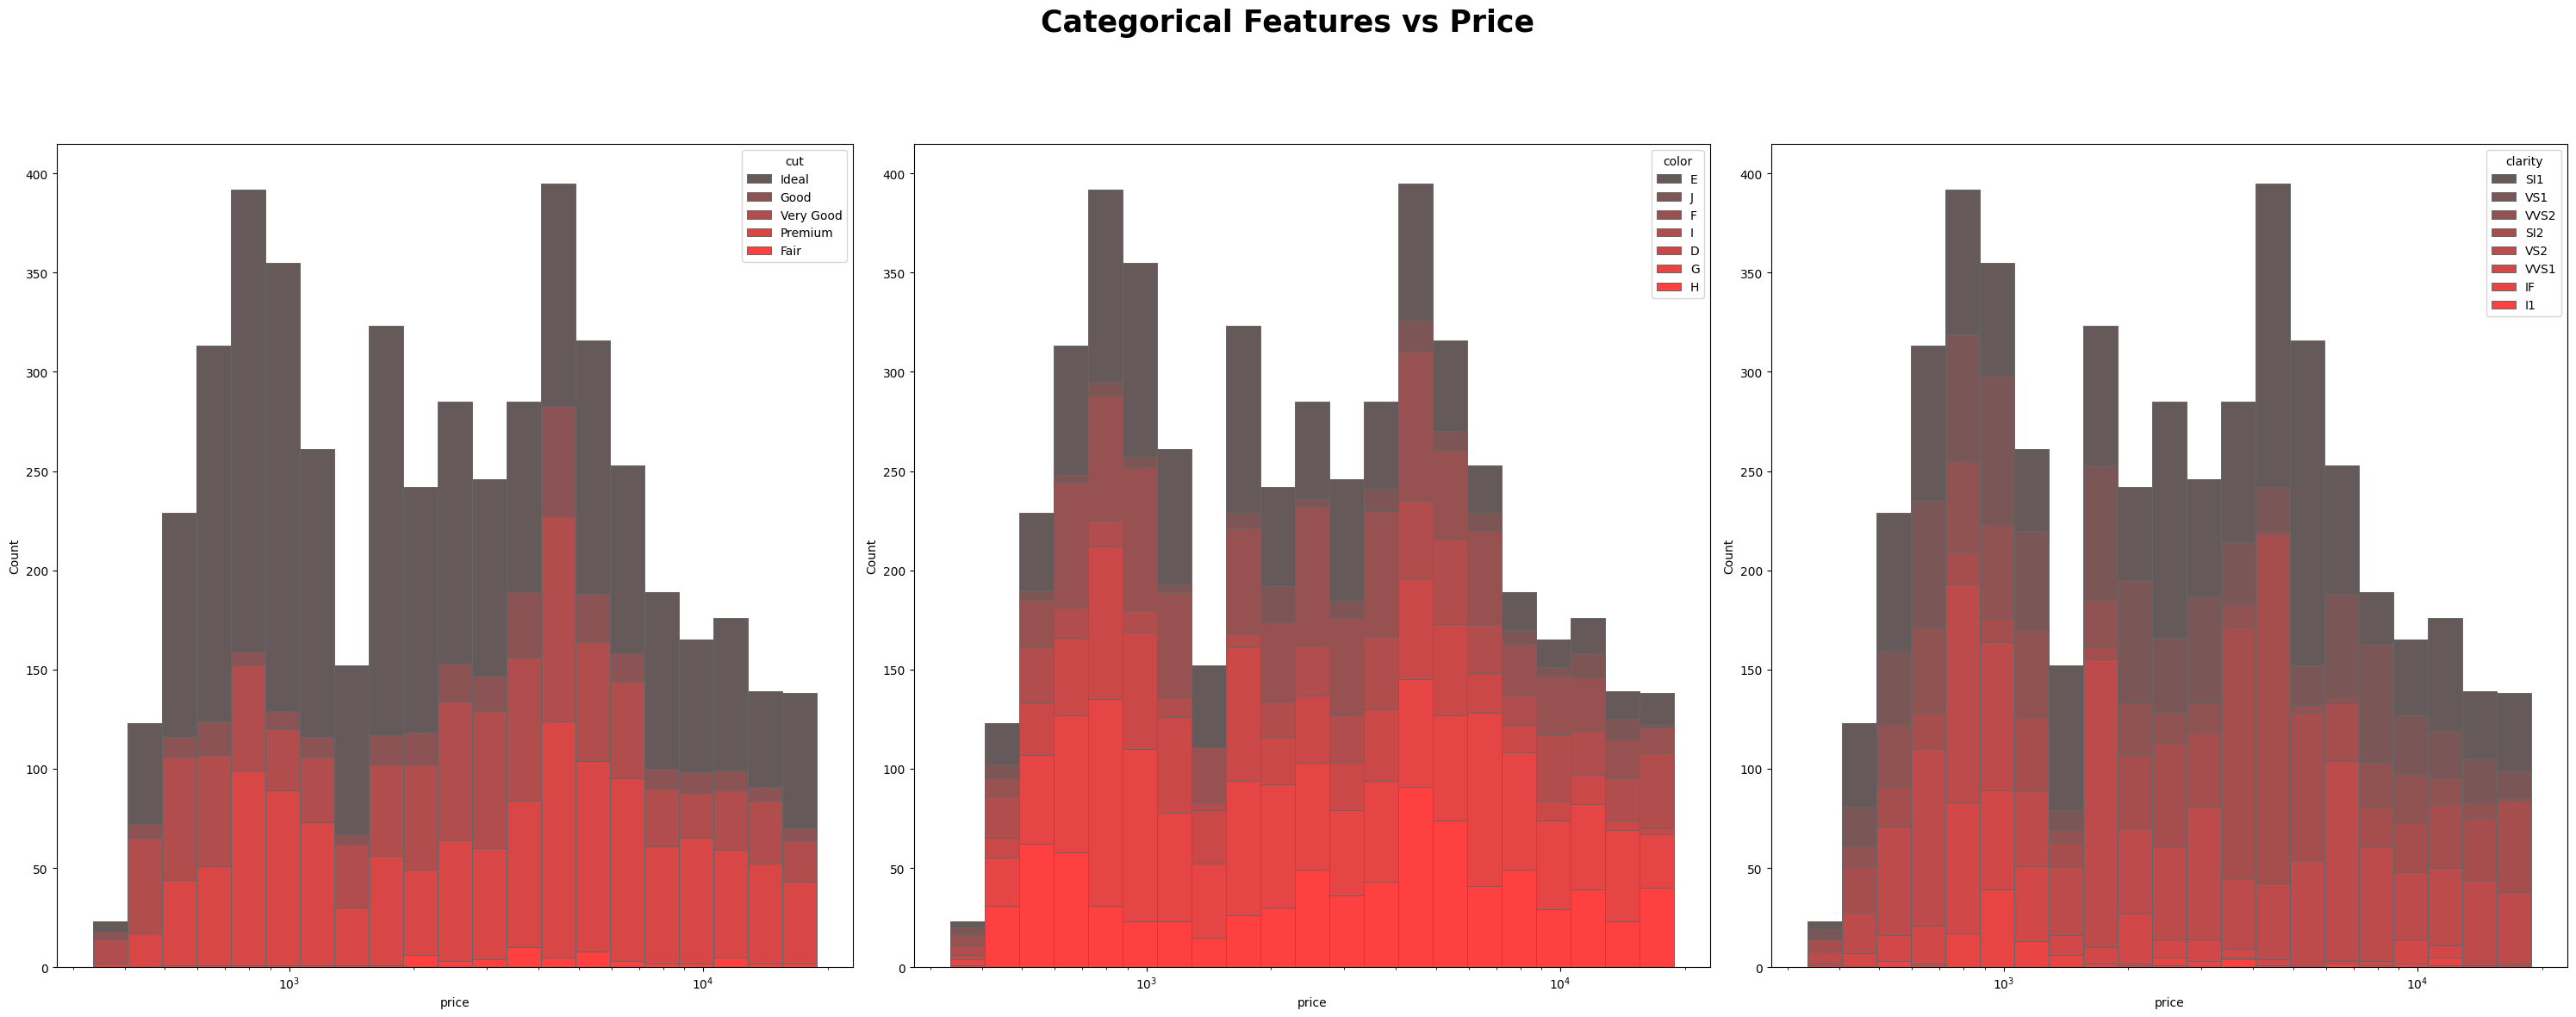

In [30]:
## Assignment Do the same for categorical data
fig, ax = plt.subplots(1, 3, figsize=(30, 12), dpi=100)
ax = ax.flatten()
for i, ft in enumerate(['cut', 'color', 'clarity']):
    sns.histplot(
        data=df,
        x="price", hue=ft,
        multiple="stack",
        palette="dark:red",
        edgecolor=".4",
        linewidth=.7,
        log_scale=True,
        ax=ax[i]
    )
fig.suptitle(f'Categorical Features vs Price\n\n\n', ha='center',  fontweight='bold', fontsize=25)
plt.tight_layout()
plt.show()

### Boxplots of all the numerical_columns

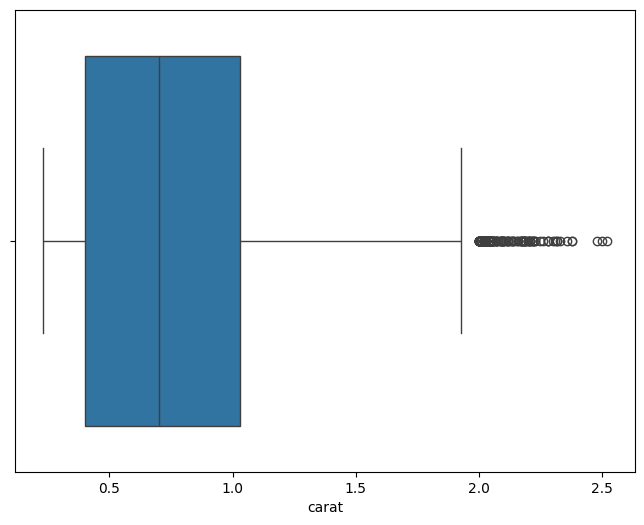

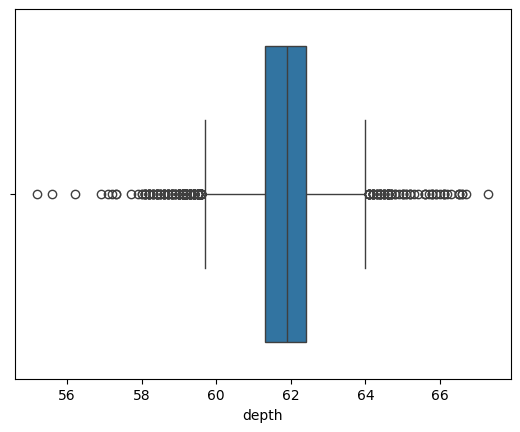

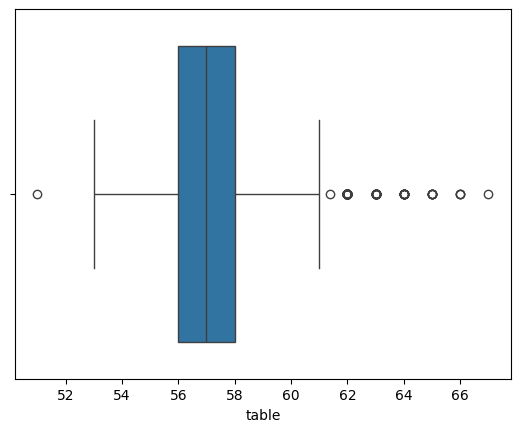

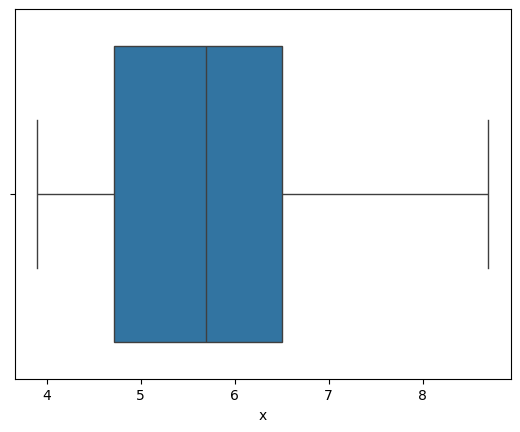

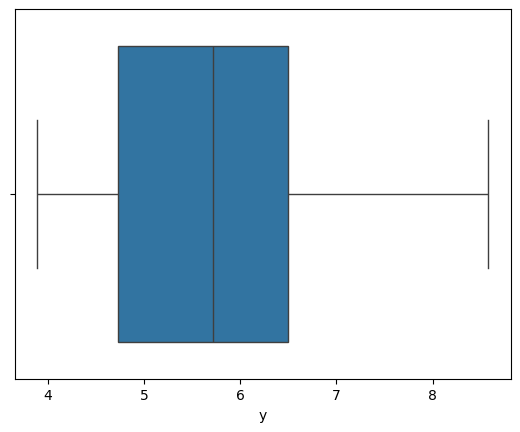

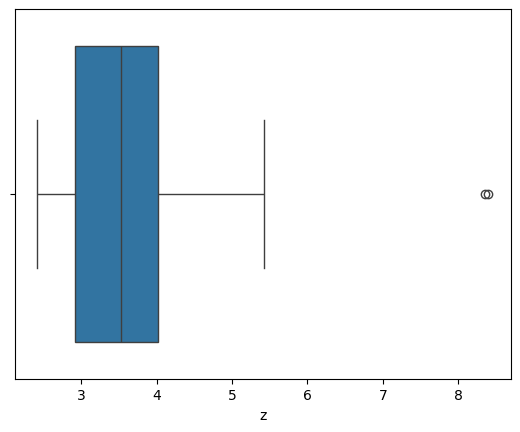

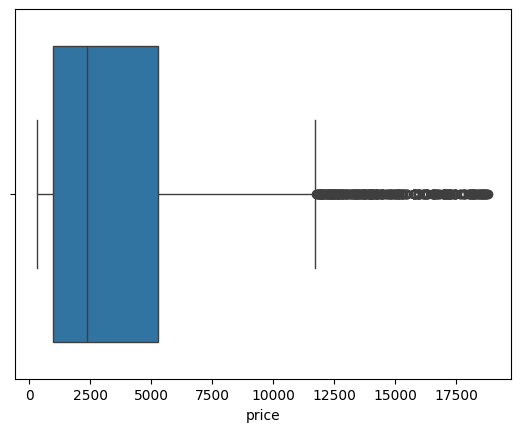

In [31]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
x=0
for i in numerical_columns:
    sns.boxplot(data=df,x=i)
    print('\n')
    plt.show()
    


### Details Analysis
All the boxplots are fine,except the price .The distribution of price is clearly right-skewed and has a huge range, which indicates the price variable will probably need some transformation in the second phase of the project.

## KDE PLot of Price

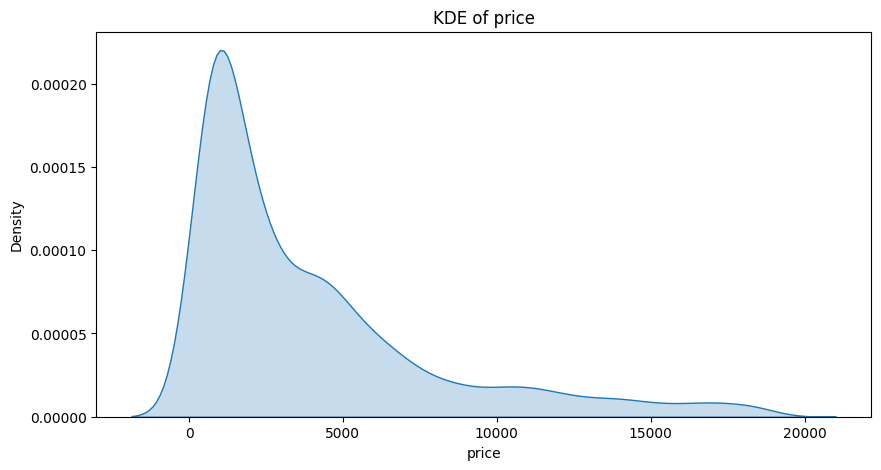

In [32]:
plt.figure(figsize=(10,5))
sns.kdeplot(df['price'],fill=True)
plt.xlabel('price')
plt.title('KDE of price')
plt.show()

## Two-Variable Visualisation

### Scatter Plot

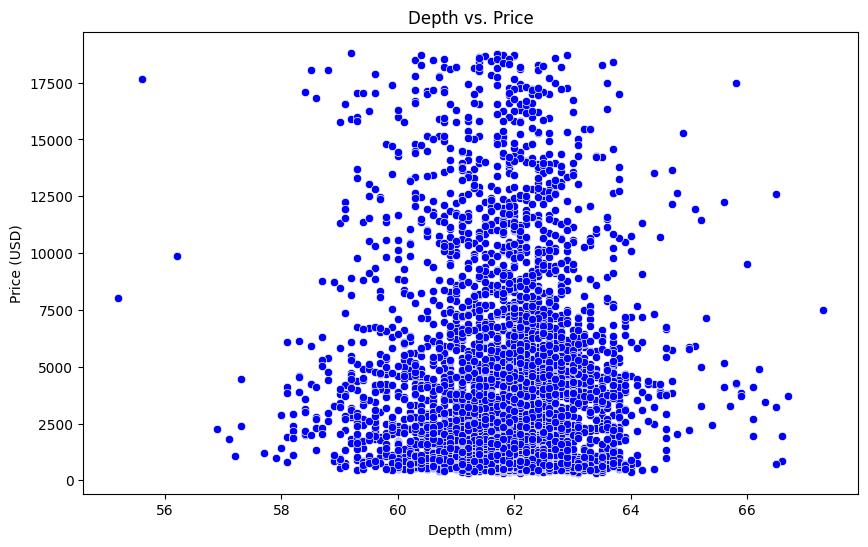

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='depth', y='price', color='blue')
plt.title('Depth vs. Price')
plt.xlabel('Depth (mm)')
plt.ylabel('Price (USD)')
plt.show()



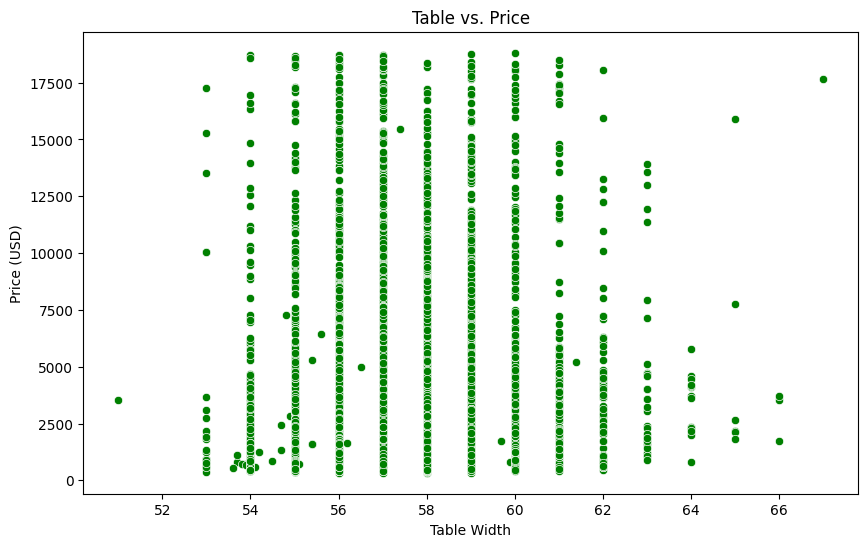

In [34]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='table', y='price', color='green')
plt.title('Table vs. Price')
plt.xlabel('Table Width')
plt.ylabel('Price (USD)')
plt.show()

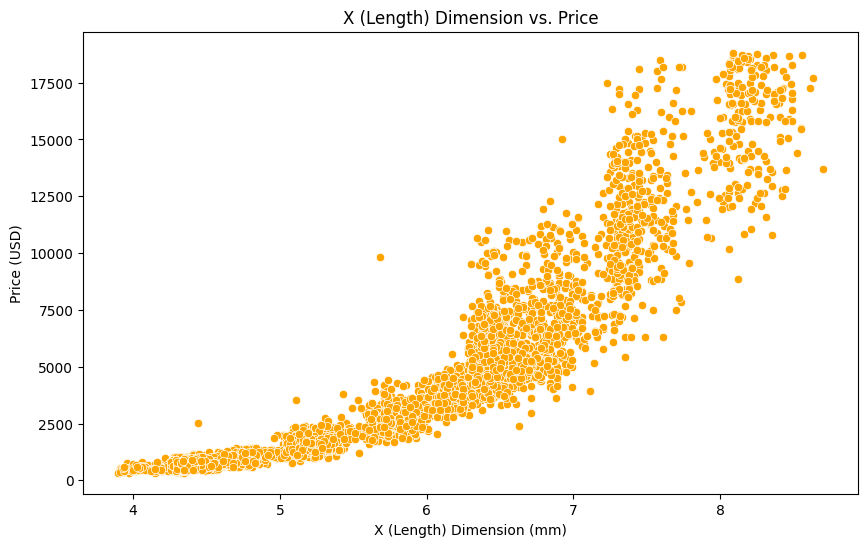

In [35]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='x', y='price', color='orange')
plt.title('X (Length) Dimension vs. Price')
plt.xlabel('X (Length) Dimension (mm)')
plt.ylabel('Price (USD)')
plt.show()



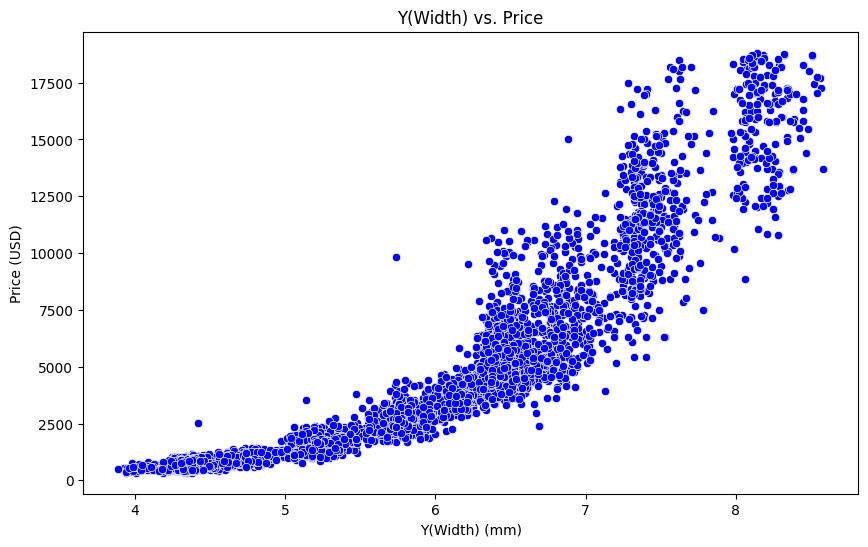

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='y', y='price', color='blue')
plt.title('Y(Width) vs. Price')
plt.xlabel('Y(Width) (mm)')
plt.ylabel('Price (USD)')
plt.show()



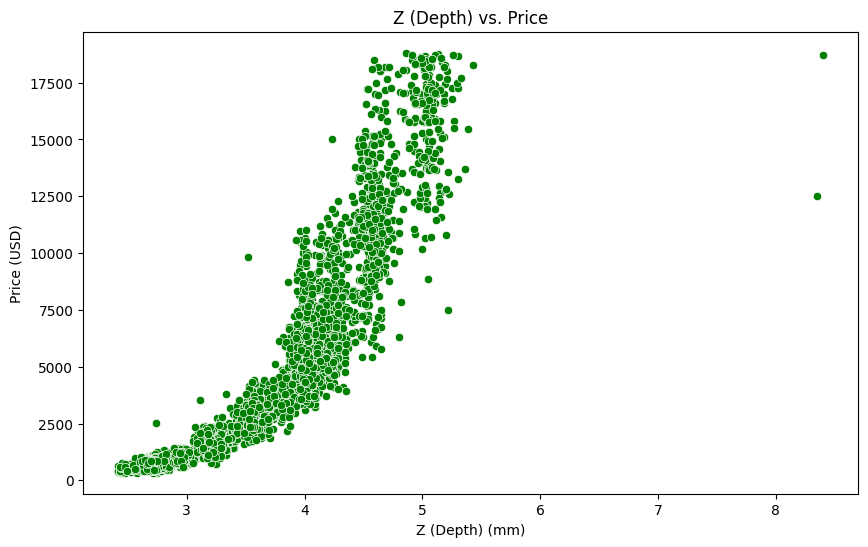

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='z', y='price', color='green')
plt.title('Z (Depth) vs. Price')
plt.xlabel('Z (Depth) (mm)')
plt.ylabel('Price (USD)')
plt.show()

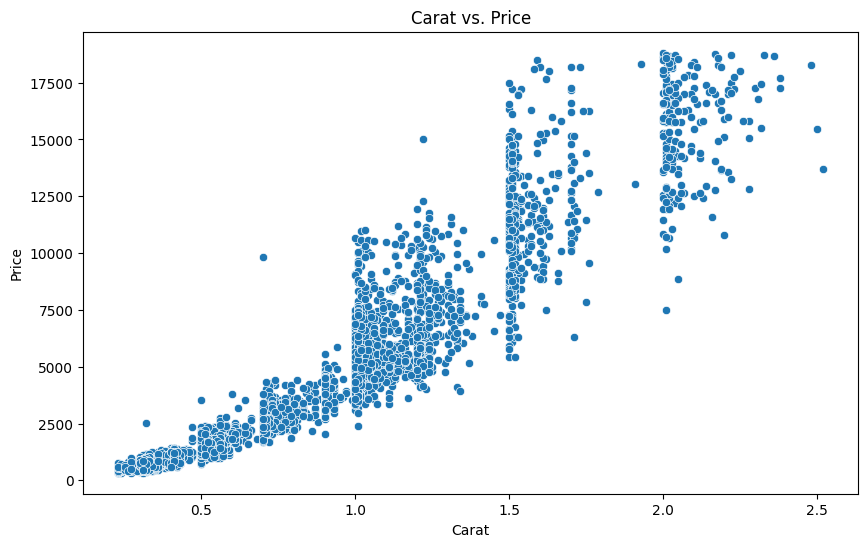

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price')
plt.title('Carat vs. Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()



## BarPlot

<function matplotlib.pyplot.show(close=None, block=None)>

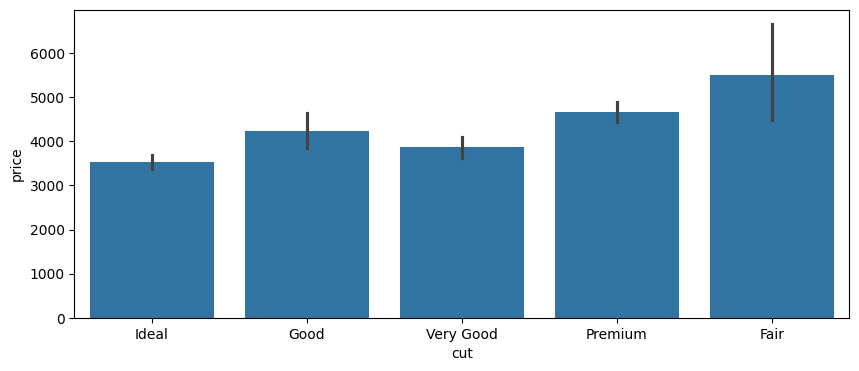

In [39]:
#Barplot in between Price and Cut
plt.figure(figsize=(10,4))
sns.barplot(data=df,y='price',x='cut')
plt.show

## BOXPLOT

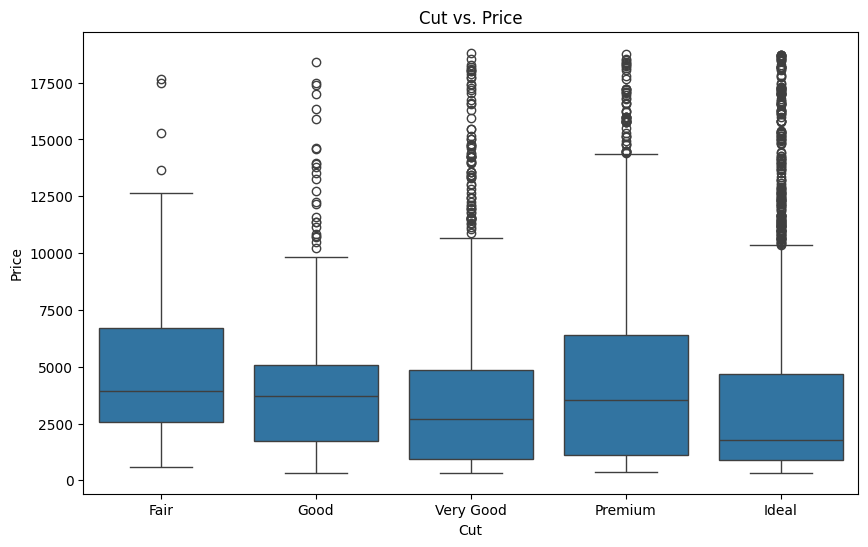

In [40]:
# Cut vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cut', y='price', order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
plt.title('Cut vs. Price')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()



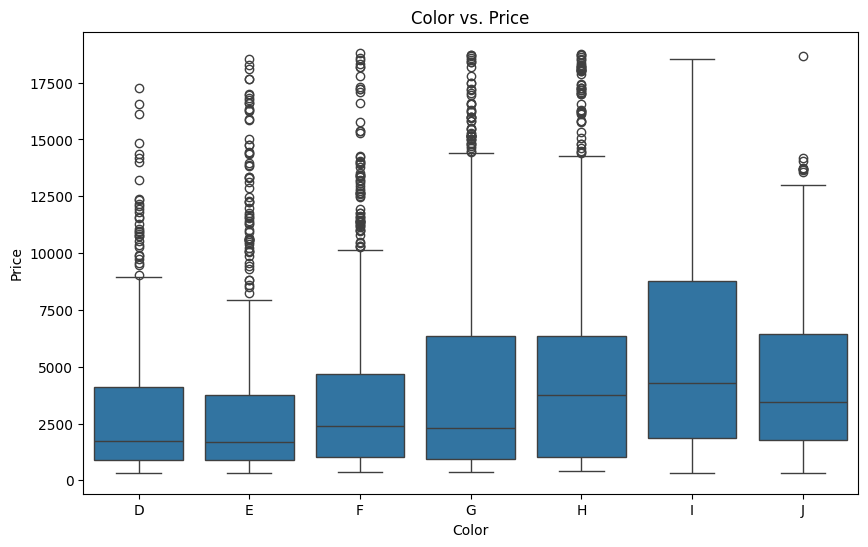

In [41]:
# Color vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='color', y='price', order=['D', 'E', 'F', 'G', 'H', 'I', 'J'])
plt.title('Color vs. Price')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()



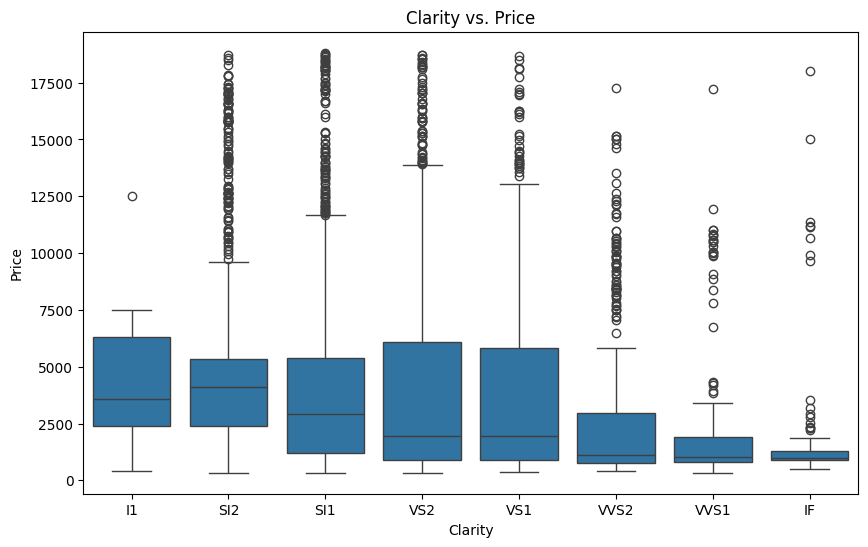

In [42]:
# Clarity vs. Price
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='clarity', y='price', order=['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'])
plt.title('Clarity vs. Price')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.show()

## Three-Variable Visualisation

#### scatter plots with color-coded

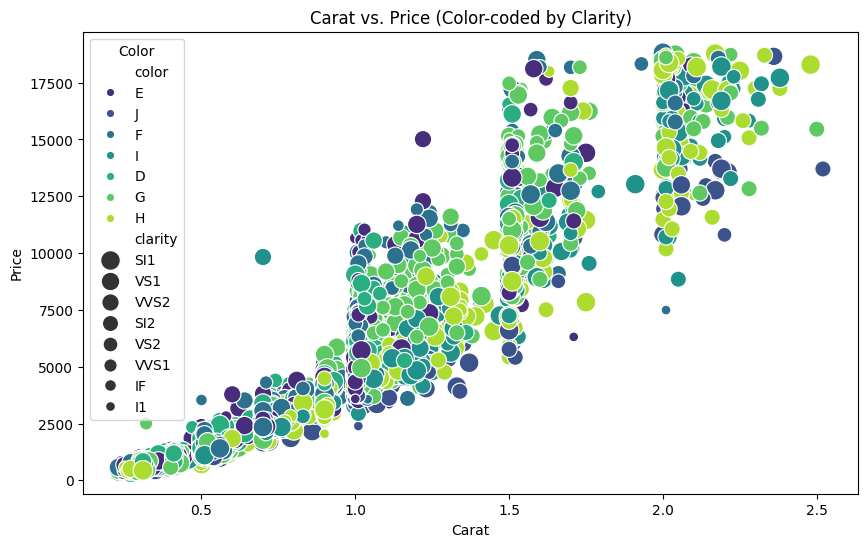

In [43]:
# Scatter plot with color-coded points based on clarity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price', hue='color', size='clarity', sizes=(50, 200), palette='viridis')
plt.title('Carat vs. Price (Color-coded by Clarity)')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Color')
plt.show()

Diamond price rises with carat weight, and higher clarity diamonds  fetch a premium.

### Facet Grid

### correlation Matrix

<Axes: >

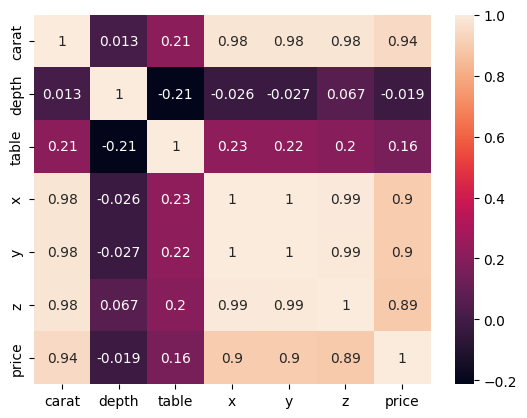

In [44]:
## correlation
sns.heatmap(df[numerical_columns].corr(),annot=True)

### Scatter Plot Matrix

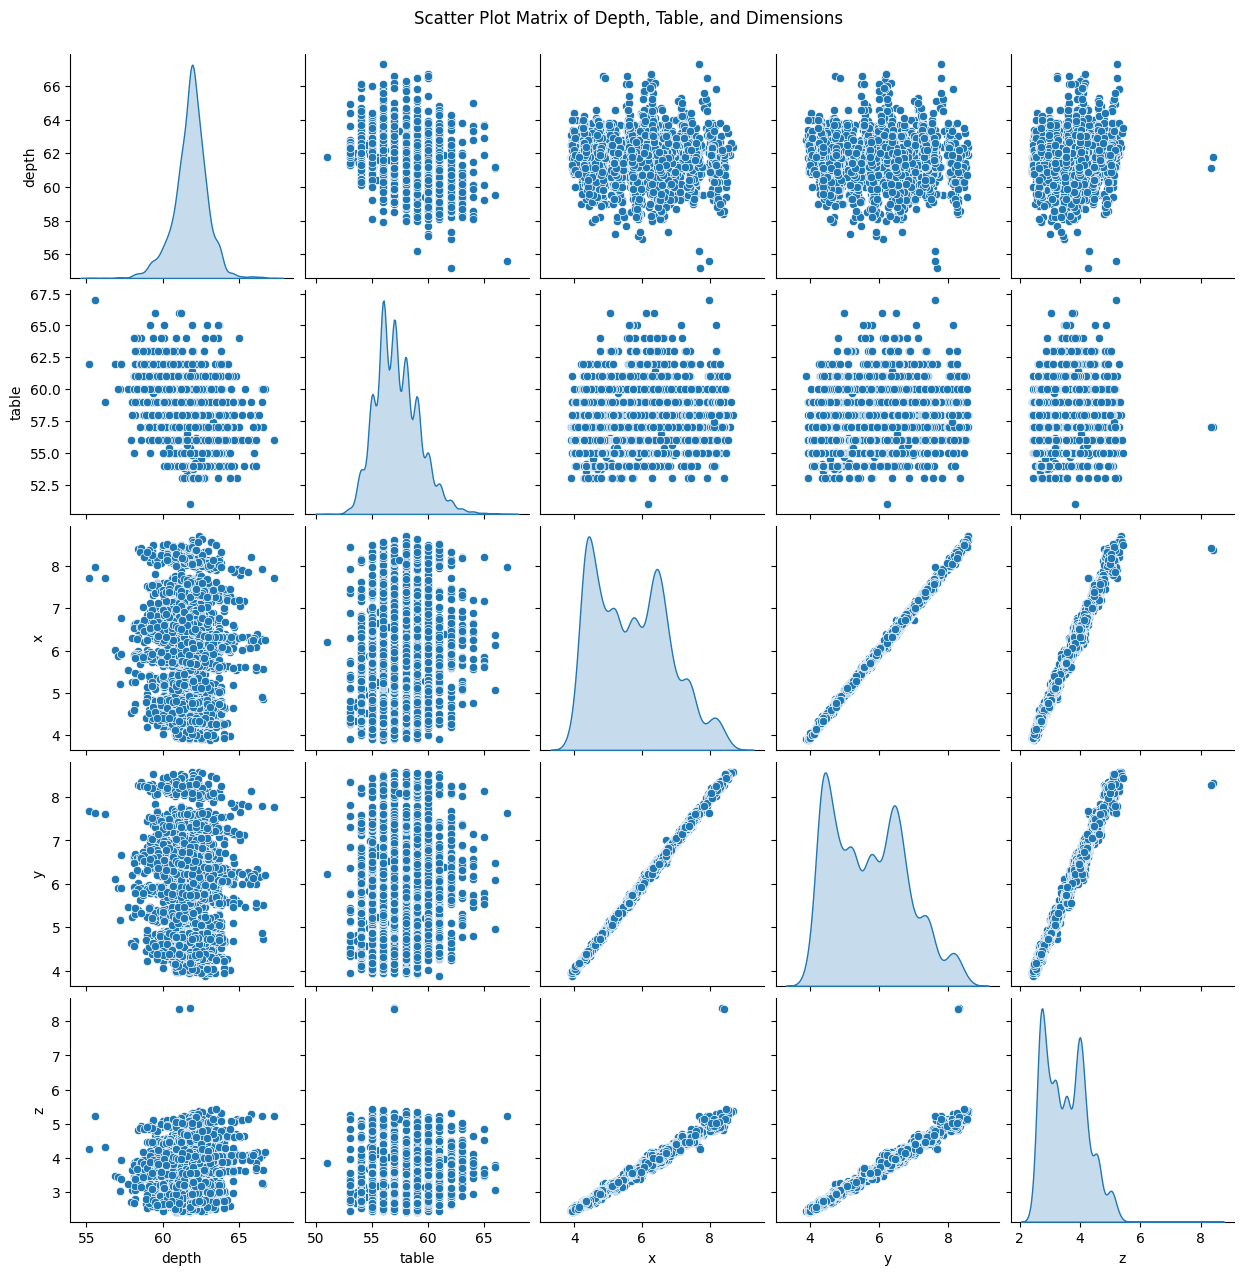

In [45]:
# Scatter Plot Matrix
scatter_matrix = sns.pairplot(df, vars=['depth', 'table', 'x', 'y', 'z'], diag_kind='kde')
scatter_matrix.fig.suptitle('Scatter Plot Matrix of Depth, Table, and Dimensions', y=1.02)
plt.show()

In [46]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
184046,1.05,Ideal,E,SI1,61.4,55.0,6.59,6.56,4.04,6937
49070,1.50,Good,J,VS1,60.1,60.0,7.30,7.36,4.41,8359
143111,0.54,Very Good,F,VVS2,62.8,54.0,5.22,5.25,3.29,2362
89111,0.33,Ideal,F,VVS2,61.7,55.0,4.48,4.47,2.76,1041
136184,0.90,Premium,I,SI1,62.5,58.0,6.13,6.06,3.81,3220


# Data PreProcessing

In [47]:
## https://www.americangemsociety.org/ags-diamond-grading-system/
df['cut'].unique()

array(['Ideal', 'Good', 'Very Good', 'Premium', 'Fair'], dtype=object)

In [48]:
cut_map={"Fair":1,"Good":2,"Very Good":3,"Premium":4,"Ideal":5}

In [49]:
df['clarity'].unique()

array(['SI1', 'VS1', 'VVS2', 'SI2', 'VS2', 'VVS1', 'IF', 'I1'],
      dtype=object)

In [50]:
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}

In [51]:
df['color'].unique()

array(['E', 'J', 'F', 'I', 'D', 'G', 'H'], dtype=object)

In [52]:
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}


In [53]:
df['cut']=df['cut'].map(cut_map)
df['clarity'] = df['clarity'].map(clarity_map)
df['color'] = df['color'].map(color_map)

In [54]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
184046,1.05,5,2,3,61.4,55.0,6.59,6.56,4.04,6937
49070,1.50,2,7,5,60.1,60.0,7.30,7.36,4.41,8359
143111,0.54,3,3,6,62.8,54.0,5.22,5.25,3.29,2362
89111,0.33,5,3,6,61.7,55.0,4.48,4.47,2.76,1041
136184,0.90,4,6,3,62.5,58.0,6.13,6.06,3.81,3220


<function matplotlib.pyplot.show(close=None, block=None)>

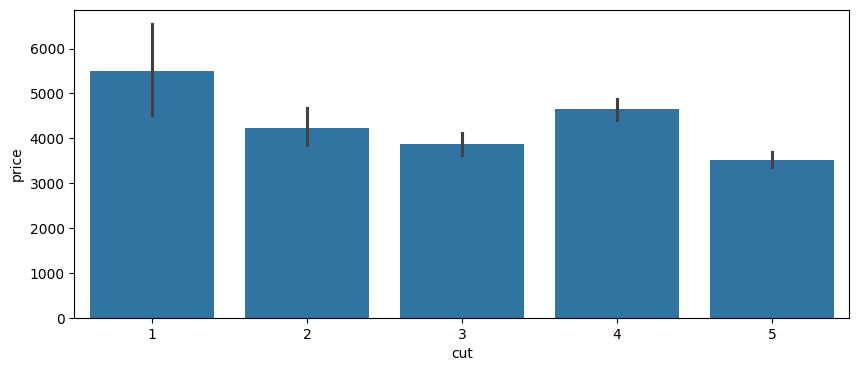

In [55]:
plt.figure(figsize=(10,4))
sns.barplot(data=df,y='price',x='cut')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

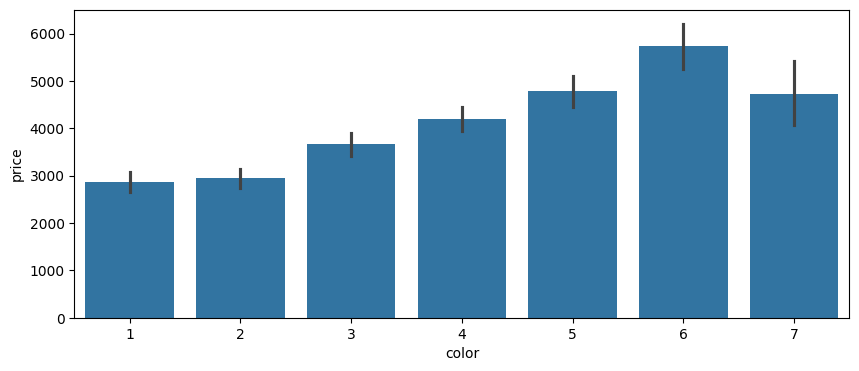

In [56]:
plt.figure(figsize=(10,4))
sns.barplot(data=df,y='price',x='color')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

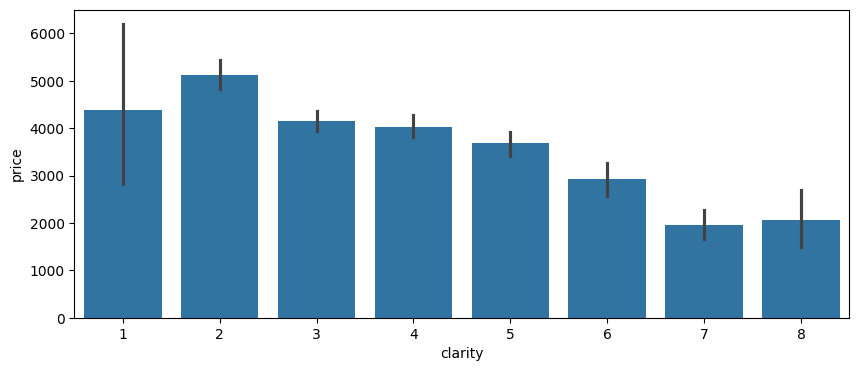

In [57]:
plt.figure(figsize=(10,4))
sns.barplot(data=df,y='price',x='clarity')
plt.show